## Synthetic Data Practice using DBSCAN

In [4]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import seaborn as sb
import matplotlib.pyplot as plt

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

df = pd.DataFrame({"f1": X[:, 0], "f2": X[:, 1]})
df.head()

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937


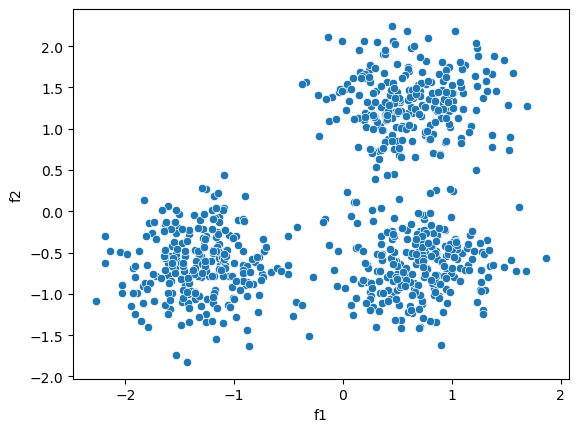

In [5]:
sb.scatterplot(df,x="f1",y="f2")
plt.show()

In [15]:
from sklearn.cluster import DBSCAN

db = DBSCAN(min_samples=10,eps=0.3)
db.fit(df[["f1","f2"]])
df["Cluster"]=db.labels_
df.head()

,f1,f2,Cluster
0,0.494261,1.451067,0
1,-1.428081,-0.837064,1
2,0.338559,1.038759,0
3,0.119001,-1.053976,2
4,1.122425,1.774937,0


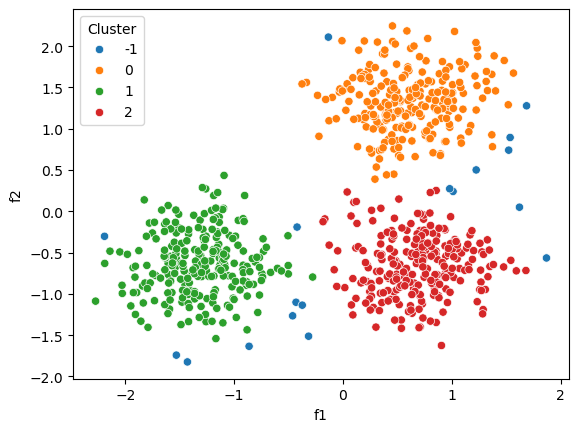

In [16]:
sb.scatterplot(df,x="f1",y="f2",hue="Cluster",palette="tab10")
plt.show()

In [17]:
list(db.labels_).count(-1)

18

## Customer Segmentation using DBSCAN

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

df = pd.read_excel("income.xlsx", names=["name","age","income"])
print(df.shape)
df.head()

(8, 3)


,name,age,income
0,Rob,29,45
1,Andrea,50,80
2,Mohan,35,52
3,Michael,32,41
4,Kory,36,87


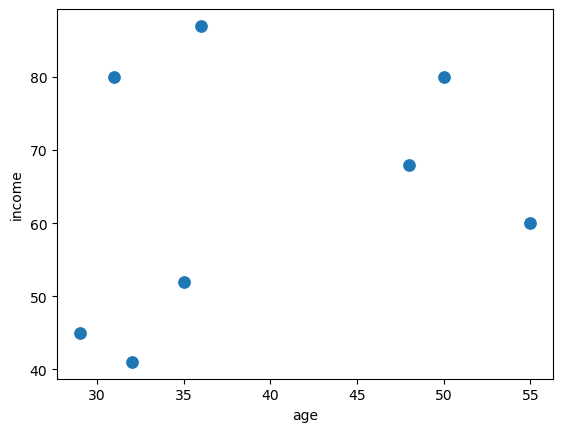

In [21]:
sb.scatterplot(df,x="age",y="income",s=100)
plt.show()

In [41]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=10,min_samples=2)
db.fit(df[["age","income"]])
df["Cluster"] = db.labels_
df.head()

,name,age,income,Cluster
0,Rob,29,45,0
1,Andrea,50,80,-1
2,Mohan,35,52,0
3,Michael,32,41,0
4,Kory,36,87,1


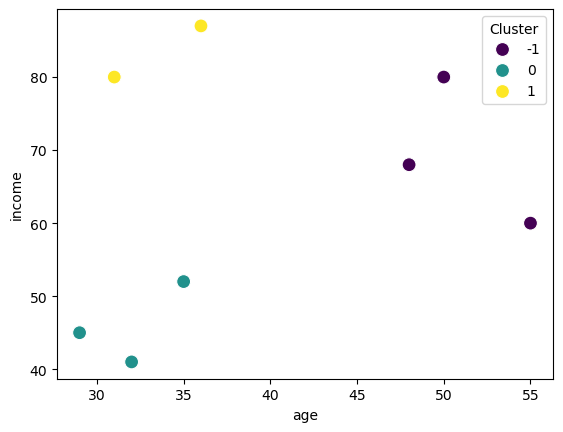

In [42]:
sb.scatterplot(df,x="age",y="income",s=100,hue="Cluster",palette="viridis")
plt.show()